# Explore here

In [1]:
# Your code here
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
df = pd.read_csv('../data/vehicles.csv')


In [3]:
df.head()


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [5]:
df.drop(columns =['id', 'url', 'region_url', 'image_url', 'description', 'posting_date', 'county', 'lat', 'long', 'region', 'VIN', 'title_status'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   model         421603 non-null  object 
 4   condition     252776 non-null  object 
 5   cylinders     249202 non-null  object 
 6   fuel          423867 non-null  object 
 7   odometer      422480 non-null  float64
 8   transmission  424324 non-null  object 
 9   drive         296313 non-null  object 
 10  size          120519 non-null  object 
 11  type          334022 non-null  object 
 12  paint_color   296677 non-null  object 
 13  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 45.6+ MB


In [6]:
print(f"Numero de datos nulos: {(df.isnull().sum().sum())}")
print(f"Numero de datos duplicados: {(df.duplicated().sum())}")
print(f"Numero de filas con precios negativos o cero: {(df[df['price'] <= 0].shape[0])}")
print(f"Numero de filas con kilometraje negativo o cero: {(df[df['odometer'] <= 0].shape[0])}")

Numero de datos nulos: 1045868
Numero de datos duplicados: 127749
Numero de filas con precios negativos o cero: 32895
Numero de filas con kilometraje negativo o cero: 1965


In [7]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Remove rows with price <= 0
df = df[df['price'] > 0]

# Remove rows with odometer <= 0
df = df[df['odometer'] > 0]

# Reset index after cleaning
df.reset_index(drop=True, inplace=True)

In [8]:
print(f"Numero de datos nulos: {(df.isnull().sum().sum())}")
print(f"Numero de datos duplicados: {(df.duplicated().sum())}")
print(f"Numero de filas con precios negativos o cero: {(df[df['price'] <= 0].shape[0])}")
print(f"Numero de filas con kilometraje negativo o cero: {(df[df['odometer'] <= 0].shape[0])}")

Numero de datos nulos: 634701
Numero de datos duplicados: 0
Numero de filas con precios negativos o cero: 0
Numero de filas con kilometraje negativo o cero: 0


In [9]:
for col in df.columns:
    print(f"{col}: {df[col].isnull().sum()}")

price: 0
year: 774
manufacturer: 12112
model: 3794
condition: 99624
cylinders: 104220
fuel: 1440
odometer: 0
transmission: 1065
drive: 81055
size: 187951
type: 63999
paint_color: 78667
state: 0


In [10]:
df.dropna(subset=['year', 'manufacturer', 'model'], inplace=True)

In [11]:
# Show the first few rows with no null values in any column
df.dropna().head()


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,state
4,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,automatic,rwd,full-size,truck,black,al
27,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,automatic,4wd,full-size,pickup,blue,al
31,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,95000.0,automatic,fwd,full-size,mini-van,silver,al
37,22500,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,manual,rwd,full-size,truck,white,al
45,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,90000.0,automatic,rwd,mid-size,sedan,grey,al


In [12]:
df['year'] = df['year'].astype(int)
df['odometer'] = df['odometer'].astype(int)
df.dropna().head()


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,state
4,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000,automatic,rwd,full-size,truck,black,al
27,19900,2004,ford,f250 super duty,good,8 cylinders,diesel,88000,automatic,4wd,full-size,pickup,blue,al
31,14000,2012,honda,odyssey,excellent,6 cylinders,gas,95000,automatic,fwd,full-size,mini-van,silver,al
37,22500,2001,ford,f450,good,8 cylinders,diesel,144700,manual,rwd,full-size,truck,white,al
45,15000,2017,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,90000,automatic,rwd,mid-size,sedan,grey,al


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 261139 entries, 0 to 277047
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         261139 non-null  int64 
 1   year          261139 non-null  int64 
 2   manufacturer  261139 non-null  object
 3   model         261139 non-null  object
 4   condition     167282 non-null  object
 5   cylinders     163229 non-null  object
 6   fuel          259905 non-null  object
 7   odometer      261139 non-null  int64 
 8   transmission  260122 non-null  object
 9   drive         186370 non-null  object
 10  size          83506 non-null   object
 11  type          203209 non-null  object
 12  paint_color   188209 non-null  object
 13  state         261139 non-null  object
dtypes: int64(3), object(11)
memory usage: 29.9+ MB


In [14]:
df['paint_color'] = df['paint_color'].fillna('unknown')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 261139 entries, 0 to 277047
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         261139 non-null  int64 
 1   year          261139 non-null  int64 
 2   manufacturer  261139 non-null  object
 3   model         261139 non-null  object
 4   condition     167282 non-null  object
 5   cylinders     163229 non-null  object
 6   fuel          259905 non-null  object
 7   odometer      261139 non-null  int64 
 8   transmission  260122 non-null  object
 9   drive         186370 non-null  object
 10  size          83506 non-null   object
 11  type          203209 non-null  object
 12  paint_color   261139 non-null  object
 13  state         261139 non-null  object
dtypes: int64(3), object(11)
memory usage: 29.9+ MB


In [16]:
unique_models = np.sort(df['model'].dropna().unique())
print(f"Unique models ({len(unique_models)}):")
print(unique_models)

Unique models (22387):
['"t"'
 '$362.47, $1000 down, oac, 2.9%apr $362.47,luxury low miles $1000 down, only 40k miles'
 '& altima' ... '\u200b\u200bsorento lx' '♿' '♿ vmi']


De aqui en adelante vamos a intentar limpiar la columna de "Models" 

In [17]:
unique_manufacturers = df['manufacturer'].dropna().unique().tolist()
print(unique_manufacturers)

['gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram', 'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick', 'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo', 'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi', 'volkswagen', 'porsche', 'kia', 'ferrari', 'mini', 'pontiac', 'fiat', 'rover', 'tesla', 'saturn', 'mercury', 'harley-davidson', 'datsun', 'aston-martin', 'land rover']


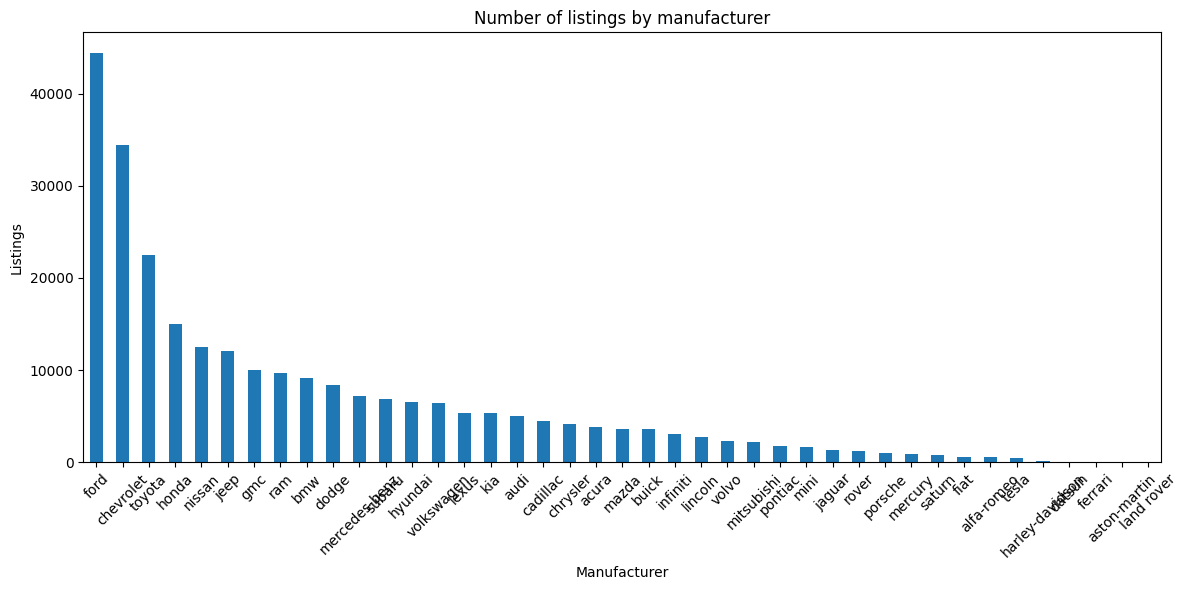

In [18]:
# count listings per manufacturer and plot
manuf_counts = df['manufacturer'].value_counts()

plt.figure(figsize=(12,6))
manuf_counts.plot(kind='bar')
plt.title('Number of listings by manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

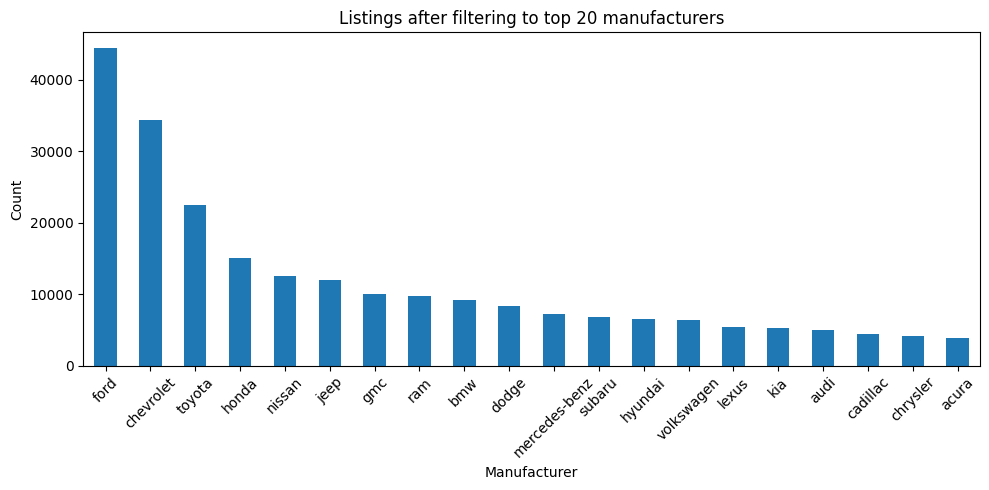

In [19]:
# determine top 20 manufacturers by number of listings
top20 = manuf_counts.head(20).index.tolist()

# keep only rows whose manufacturer is in that top‑20 list
df = df[df['manufacturer'].isin(top20)].copy()

# recompute counts and inspect
manuf_counts = df['manufacturer'].value_counts()
manuf_counts

# optional: visual check
plt.figure(figsize=(10,5))
manuf_counts.plot(kind='bar')
plt.title('Listings after filtering to top 20 manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
# create a new dataframe based on the most recent filtered `df` (top-20 manufacturers)
df2 = df.copy()
df2.reset_index(drop=True, inplace=True)

# quick check
print("df2 shape:", df2.shape)
df2.head()


df2 shape: (233389, 14)


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,state
0,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923,other,NaN,NaN,pickup,white,al
1,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229,other,NaN,NaN,pickup,blue,al
2,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160,other,NaN,NaN,pickup,red,al
3,30990,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124,other,NaN,NaN,pickup,red,al
4,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000,automatic,rwd,full-size,truck,black,al


In [21]:
# remove the `state` column from the working DataFrames
df.drop(columns=['state'], inplace=True)
df2.drop(columns=['state'], inplace=True)

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233389 entries, 0 to 233388
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         233389 non-null  int64 
 1   year          233389 non-null  int64 
 2   manufacturer  233389 non-null  object
 3   model         233389 non-null  object
 4   condition     147123 non-null  object
 5   cylinders     147572 non-null  object
 6   fuel          232248 non-null  object
 7   odometer      233389 non-null  int64 
 8   transmission  232459 non-null  object
 9   drive         167889 non-null  object
 10  size          75322 non-null   object
 11  type          180774 non-null  object
 12  paint_color   233389 non-null  object
dtypes: int64(3), object(10)
memory usage: 23.1+ MB


In [23]:
import re

def heavy_clean_model(text):
    if not isinstance(text, str):
        return "unknown"
    
    # 1. Lowercase and strip whitespace/hidden characters
    text = text.lower().strip()
    text = text.replace('\u200b', '') # Fix that hidden character from your screenshot
    
    # 2. Remove common "Sales Junk" and noise
    # This removes prices, "down payment", "low miles", and special symbols
    text = re.sub(r'\$\d+(k|,\d+)?(\.\d+)?', '', text) # Removes $362.47 or $1000
    text = re.sub(r'\d+%', '', text) # Removes 2.9%
    text = re.sub(r'low miles|down|oac|warranty|credit|financing', '', text)
    
    # 3. Strip out common trim/engine info that clutters the "Model"
    # (e.g., turning "Sorento LX" into just "Sorento")
    trim_words = [' lx', ' se', ' le', ' sle', ' xlt', ' lariat', ' limited', ' sport', ' 4wd', ' awd']
    for word in trim_words:
        text = text.replace(word, '')

    # 4. Final Cleanup of punctuation and extra spaces
    text = re.sub(r'[^\w\s]', '', text) # Removes symbols like & or "
    text = " ".join(text.split()) # Removes double spaces
    
    return text

# Apply the cleaning
df2['model_cleaned'] = df2['model'].apply(heavy_clean_model)

# Apply your length constraints (3 to 25 characters)
# If it's outside the range, we mark it as 'other' or 'unknown'
mask = df2['model_cleaned'].str.len().between(3, 25)
df2.loc[~mask, 'model_cleaned'] = 'other'

# Show results
print(df2['model_cleaned'].value_counts().head(20))


model_cleaned
other             9213
f150              6295
silverado 1500    3020
camry             2773
1500              2557
accord            2514
civic             2408
escape            2304
silverado         2095
explorer          2069
wrangler          1942
altima            1796
grand cherokee    1784
corolla           1740
crv               1692
tacoma            1679
fusion            1658
focus             1640
f250              1554
mustang           1541
Name: count, dtype: int64


In [24]:
# See the top 20 most frequent models after cleaning
top_models = df2['model_cleaned'].value_counts().head(20)
print(top_models)

model_cleaned
other             9213
f150              6295
silverado 1500    3020
camry             2773
1500              2557
accord            2514
civic             2408
escape            2304
silverado         2095
explorer          2069
wrangler          1942
altima            1796
grand cherokee    1784
corolla           1740
crv               1692
tacoma            1679
fusion            1658
focus             1640
f250              1554
mustang           1541
Name: count, dtype: int64


In [25]:
# Create a new DataFrame with only valid, cleaned models
df_cleaned = df2[df2['model_cleaned'] != 'other'].copy()

# Optional: Drop the original messy 'model' column to save space
df_cleaned = df_cleaned.drop(columns=['model'])

# Verify the new shape
print(f"Original rows: {df2.shape[0]}")
print(f"Cleaned rows: {df_cleaned.shape[0]}")

Original rows: 233389
Cleaned rows: 224176


In [26]:
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 224176 entries, 0 to 233388
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   price          224176 non-null  int64 
 1   year           224176 non-null  int64 
 2   manufacturer   224176 non-null  object
 3   condition      142795 non-null  object
 4   cylinders      141777 non-null  object
 5   fuel           223312 non-null  object
 6   odometer       224176 non-null  int64 
 7   transmission   223292 non-null  object
 8   drive          161263 non-null  object
 9   size           73178 non-null   object
 10  type           172992 non-null  object
 11  paint_color    224176 non-null  object
 12  model_cleaned  224176 non-null  object
dtypes: int64(3), object(10)
memory usage: 23.9+ MB


In [27]:
df_cleaned.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,model_cleaned
0,33590,2014,gmc,good,8 cylinders,gas,57923,other,NaN,NaN,pickup,white,sierra 1500 crew cab slt
1,22590,2010,chevrolet,good,8 cylinders,gas,71229,other,NaN,NaN,pickup,blue,silverado 1500
2,39590,2020,chevrolet,good,8 cylinders,gas,19160,other,NaN,NaN,pickup,red,silverado 1500 crew
3,30990,2017,toyota,good,8 cylinders,gas,41124,other,NaN,NaN,pickup,red,tundra double cab sr
4,15000,2013,ford,excellent,6 cylinders,gas,128000,automatic,rwd,full-size,truck,black,f150


In [28]:
# Filter the DataFrame for 'other' labels
df_other = df2[df2['model_cleaned'] == 'other']

# Display the first 50 rows
# We include the original 'model' column so you can compare it to the 'model_cleaned'
print(df_other[['model', 'model_cleaned']].head(50))

                                        model model_cleaned
5                 sierra 2500 hd extended cab         other
17                 ranger supercrew xl pickup         other
19                f150 super cab xl pickup 4d         other
23                 1500 regular cab tradesman         other
28                 f150 regular cab xl pickup         other
31               1500 quad cab express pickup         other
32               sierra 1500 extended cab slt         other
49                f150 super cab xl pickup 4d         other
63               sierra 1500 extended cab slt         other
64                f250 super duty regular cab         other
67                 wrangler unlimited rubicon         other
68                 wrangler unlimited all new         other
84               1500 crew cab laramie pickup         other
85                 wrangler unlimited rubicon         other
101                                        z4         other
143           silverado 1500 ltz crew ca

In [29]:
# Keep only rows where model_cleaned is NOT 'other'
df2 = df2[df2['model_cleaned'] != 'other'].reset_index(drop=True)

# Verify the results
print(f"Total rows remaining: {len(df2)}")
print("-" * 30)
print("Top 20 Models after dropping 'other':")
print(df2['model_cleaned'].value_counts().head(20))


Total rows remaining: 224176
------------------------------
Top 20 Models after dropping 'other':
model_cleaned
f150              6295
silverado 1500    3020
camry             2773
1500              2557
accord            2514
civic             2408
escape            2304
silverado         2095
explorer          2069
wrangler          1942
altima            1796
grand cherokee    1784
corolla           1740
crv               1692
tacoma            1679
fusion            1658
focus             1640
f250              1554
mustang           1541
2500              1477
Name: count, dtype: int64


In [30]:
df2.head()


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,model_cleaned
0,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923,other,NaN,NaN,pickup,white,sierra 1500 crew cab slt
1,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229,other,NaN,NaN,pickup,blue,silverado 1500
2,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160,other,NaN,NaN,pickup,red,silverado 1500 crew
3,30990,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124,other,NaN,NaN,pickup,red,tundra double cab sr
4,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000,automatic,rwd,full-size,truck,black,f150


In [31]:
# Drop the original 'model' column
df2 = df2.drop(columns=['model'])

# Check the first few rows to confirm it's gone
df2.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,model_cleaned
0,33590,2014,gmc,good,8 cylinders,gas,57923,other,NaN,NaN,pickup,white,sierra 1500 crew cab slt
1,22590,2010,chevrolet,good,8 cylinders,gas,71229,other,NaN,NaN,pickup,blue,silverado 1500
2,39590,2020,chevrolet,good,8 cylinders,gas,19160,other,NaN,NaN,pickup,red,silverado 1500 crew
3,30990,2017,toyota,good,8 cylinders,gas,41124,other,NaN,NaN,pickup,red,tundra double cab sr
4,15000,2013,ford,excellent,6 cylinders,gas,128000,automatic,rwd,full-size,truck,black,f150


In [32]:
# 1. Get a list of all current columns
cols = list(df2.columns)

# 2. Remove 'model_cleaned' from its current position (the end) 
# and insert it at index 3 (right after 'manufacturer')
cols.insert(3, cols.pop(cols.index('model_cleaned')))

# 3. Re-assign the reordered columns to the DataFrame
df2 = df2[cols]

# Verify the new order
df2.head()


,price,year,manufacturer,model_cleaned,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color
0,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923,other,NaN,NaN,pickup,white
1,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229,other,NaN,NaN,pickup,blue
2,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160,other,NaN,NaN,pickup,red
3,30990,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124,other,NaN,NaN,pickup,red
4,15000,2013,ford,f150,excellent,6 cylinders,gas,128000,automatic,rwd,full-size,truck,black


In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224176 entries, 0 to 224175
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   price          224176 non-null  int64 
 1   year           224176 non-null  int64 
 2   manufacturer   224176 non-null  object
 3   model_cleaned  224176 non-null  object
 4   condition      142795 non-null  object
 5   cylinders      141777 non-null  object
 6   fuel           223312 non-null  object
 7   odometer       224176 non-null  int64 
 8   transmission   223292 non-null  object
 9   drive          161263 non-null  object
 10  size           73178 non-null   object
 11  type           172992 non-null  object
 12  paint_color    224176 non-null  object
dtypes: int64(3), object(10)
memory usage: 22.2+ MB


In [34]:
# 1. Create a reference mapping: Model -> Most frequent Size
# We group by model and pick the 'size' that appears most often for that model
model_size_map = df2.groupby('model_cleaned')['size'].apply(
    lambda x: x.mode()[0] if not x.mode().empty else None
)

# 2. Fill the missing values in the 'size' column using the map
df2['size'] = df2['size'].fillna(df2['model_cleaned'].map(model_size_map))

# 3. Check how many missing values remain
remaining_nulls = df2['size'].isnull().sum()
print(f"Missing values remaining in 'size': {remaining_nulls}")


Missing values remaining in 'size': 30438


In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224176 entries, 0 to 224175
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   price          224176 non-null  int64 
 1   year           224176 non-null  int64 
 2   manufacturer   224176 non-null  object
 3   model_cleaned  224176 non-null  object
 4   condition      142795 non-null  object
 5   cylinders      141777 non-null  object
 6   fuel           223312 non-null  object
 7   odometer       224176 non-null  int64 
 8   transmission   223292 non-null  object
 9   drive          161263 non-null  object
 10  size           193738 non-null  object
 11  type           172992 non-null  object
 12  paint_color    224176 non-null  object
dtypes: int64(3), object(10)
memory usage: 22.2+ MB


In [36]:
# 1. Create a reference mapping: Model -> Most frequent Type
# This finds the most common 'type' entry for every specific model
model_type_map = df2.groupby('model_cleaned')['type'].apply(
    lambda x: x.mode()[0] if not x.mode().empty else None
)

# 2. Fill the missing values in the 'type' column using that mapping
df2['type'] = df2['type'].fillna(df2['model_cleaned'].map(model_type_map))

# 3. Check the progress
remaining_type_nulls = df2['type'].isnull().sum()
print(f"Missing values remaining in 'type': {remaining_type_nulls}")

# 4. View the results
print("-" * 30)
print("Top 10 Vehicle Types after filling:")
print(df2['type'].value_counts().head(10))


Missing values remaining in 'type': 2765
------------------------------
Top 10 Vehicle Types after filling:
type
sedan        59452
SUV          54273
pickup       27934
truck        25779
coupe        12204
other         9241
hatchback     9239
van           6655
wagon         6574
mini-van      4984
Name: count, dtype: int64


In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224176 entries, 0 to 224175
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   price          224176 non-null  int64 
 1   year           224176 non-null  int64 
 2   manufacturer   224176 non-null  object
 3   model_cleaned  224176 non-null  object
 4   condition      142795 non-null  object
 5   cylinders      141777 non-null  object
 6   fuel           223312 non-null  object
 7   odometer       224176 non-null  int64 
 8   transmission   223292 non-null  object
 9   drive          161263 non-null  object
 10  size           193738 non-null  object
 11  type           221411 non-null  object
 12  paint_color    224176 non-null  object
dtypes: int64(3), object(10)
memory usage: 22.2+ MB


In [38]:
# Create the map for cylinders
cyl_map = df2.groupby('model_cleaned')['cylinders'].apply(
    lambda x: x.mode()[0] if not x.mode().empty else None
)

# Fill the missing values
df2['cylinders'] = df2['cylinders'].fillna(df2['model_cleaned'].map(cyl_map))

In [39]:
# First try by model (most accurate)
drive_model_map = df2.groupby('model_cleaned')['drive'].apply(
    lambda x: x.mode()[0] if not x.mode().empty else None
)
df2['drive'] = df2['drive'].fillna(df2['model_cleaned'].map(drive_model_map))

# Second pass: If still missing, fill by vehicle type
drive_type_map = df2.groupby('type')['drive'].apply(
    lambda x: x.mode()[0] if not x.mode().empty else None
)
df2['drive'] = df2['drive'].fillna(df2['type'].map(drive_type_map))

In [40]:
# 1. Drop the 'condition' column
df2 = df2.drop(columns=['condition'])

# 2. Drop any remaining rows with missing values (the "unfillables")
df2 = df2.dropna().reset_index(drop=True)

# 3. Verify the final state of the dataset
print(f"Final row count: {len(df2)}")
print("-" * 30)
df2.info()

Final row count: 192207
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192207 entries, 0 to 192206
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   price          192207 non-null  int64 
 1   year           192207 non-null  int64 
 2   manufacturer   192207 non-null  object
 3   model_cleaned  192207 non-null  object
 4   cylinders      192207 non-null  object
 5   fuel           192207 non-null  object
 6   odometer       192207 non-null  int64 
 7   transmission   192207 non-null  object
 8   drive          192207 non-null  object
 9   size           192207 non-null  object
 10  type           192207 non-null  object
 11  paint_color    192207 non-null  object
dtypes: int64(3), object(9)
memory usage: 17.6+ MB


In [41]:
df2.head()

,price,year,manufacturer,model_cleaned,cylinders,fuel,odometer,transmission,drive,size,type,paint_color
0,22590,2010,chevrolet,silverado 1500,8 cylinders,gas,71229,other,4wd,full-size,pickup,blue
1,30990,2017,toyota,tundra double cab sr,8 cylinders,gas,41124,other,4wd,full-size,pickup,red
2,15000,2013,ford,f150,6 cylinders,gas,128000,automatic,rwd,full-size,truck,black
3,35000,2019,toyota,tacoma,6 cylinders,gas,43000,automatic,4wd,mid-size,truck,grey
4,29990,2016,chevrolet,colorado extended cab,6 cylinders,gas,17302,other,4wd,mid-size,pickup,red


In [42]:
# 1. Range of Prices
price_min, price_max = df2['price'].min(), df2['price'].max()

# 2. Range of Years
year_min, year_max = df2['year'].min(), df2['year'].max()

# 3. Range of Odometer
odo_min, odo_max = df2['odometer'].min(), df2['odometer'].max()

# Print the results
print(f"--- Numerical Ranges ---")
print(f"Price Range:    ${price_min:,} to ${price_max:,}")
print(f"Year Range:     {year_min} to {year_max}")
print(f"Odometer Range: {odo_min:,} to {odo_max:,} miles")
print("\n" + "-"*30 + "\n")

# List of categorical columns to inspect
categorical_cols = [
    'manufacturer', 'cylinders', 'fuel', 'transmission', 
    'drive', 'size', 'type', 'paint_color'
]

print(f"--- Unique Categorical Values ---")
for col in categorical_cols:
    unique_vals = sorted(df2[col].unique().astype(str))
    print(f"{col.upper()} ({len(unique_vals)}):")
    print(f"{unique_vals}\n")

--- Numerical Ranges ---
Price Range:    $1 to $3,736,928,711
Year Range:     1900 to 2022
Odometer Range: 1 to 10,000,000 miles

------------------------------

--- Unique Categorical Values ---
MANUFACTURER (20):
[np.str_('acura'), np.str_('audi'), np.str_('bmw'), np.str_('cadillac'), np.str_('chevrolet'), np.str_('chrysler'), np.str_('dodge'), np.str_('ford'), np.str_('gmc'), np.str_('honda'), np.str_('hyundai'), np.str_('jeep'), np.str_('kia'), np.str_('lexus'), np.str_('mercedes-benz'), np.str_('nissan'), np.str_('ram'), np.str_('subaru'), np.str_('toyota'), np.str_('volkswagen')]

CYLINDERS (8):
[np.str_('10 cylinders'), np.str_('12 cylinders'), np.str_('3 cylinders'), np.str_('4 cylinders'), np.str_('5 cylinders'), np.str_('6 cylinders'), np.str_('8 cylinders'), np.str_('other')]

FUEL (5):
[np.str_('diesel'), np.str_('electric'), np.str_('gas'), np.str_('hybrid'), np.str_('other')]

TRANSMISSION (3):
[np.str_('automatic'), np.str_('manual'), np.str_('other')]

DRIVE (3):
[np.st

In [43]:
print(f"--- Unique Categorical Values ---")
for col in categorical_cols:
    # Convert to standard Python strings and then get unique values
    unique_vals = sorted(df2[col].unique().astype(str).tolist())
    
    print(f"{col.upper()} ({len(unique_vals)}):")
    print(f"{unique_vals}\n")

--- Unique Categorical Values ---
MANUFACTURER (20):
['acura', 'audi', 'bmw', 'cadillac', 'chevrolet', 'chrysler', 'dodge', 'ford', 'gmc', 'honda', 'hyundai', 'jeep', 'kia', 'lexus', 'mercedes-benz', 'nissan', 'ram', 'subaru', 'toyota', 'volkswagen']

CYLINDERS (8):
['10 cylinders', '12 cylinders', '3 cylinders', '4 cylinders', '5 cylinders', '6 cylinders', '8 cylinders', 'other']

FUEL (5):
['diesel', 'electric', 'gas', 'hybrid', 'other']

TRANSMISSION (3):
['automatic', 'manual', 'other']

DRIVE (3):
['4wd', 'fwd', 'rwd']

SIZE (4):
['compact', 'full-size', 'mid-size', 'sub-compact']

TYPE (13):
['SUV', 'bus', 'convertible', 'coupe', 'hatchback', 'mini-van', 'offroad', 'other', 'pickup', 'sedan', 'truck', 'van', 'wagon']

PAINT_COLOR (13):
['black', 'blue', 'brown', 'custom', 'green', 'grey', 'orange', 'purple', 'red', 'silver', 'unknown', 'white', 'yellow']



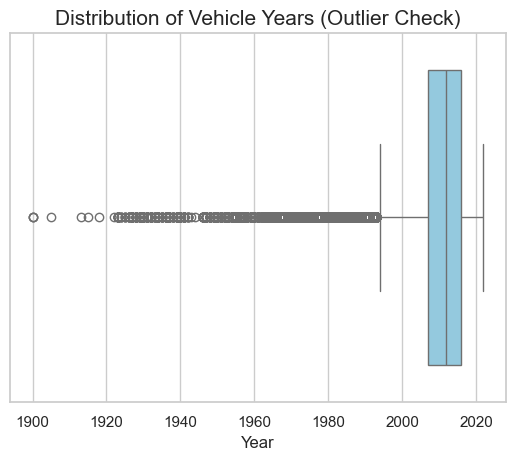

In [44]:
# Set the visual style
sns.set_theme(style="whitegrid")

# Create the box plot for the 'year' column
sns.boxplot(x=df2['year'], color='skyblue')

# Add titles and labels for clarity
plt.title('Distribution of Vehicle Years (Outlier Check)', fontsize=15)
plt.xlabel('Year', fontsize=12)

# Save the plot to view it
plt.savefig('year_outliers_boxplot.png')

In [45]:
# 1. Filter the DataFrame for the desired year range
df2 = df2[(df2['year'] >= 1995) & (df2['year'] <= 2022)].reset_index(drop=True)

# 2. Verify the new range
print(f"New Year Range: {df2['year'].min()} to {df2['year'].max()}")
print(f"Total rows remaining: {len(df2):,}")

New Year Range: 1995 to 2022
Total rows remaining: 183,673


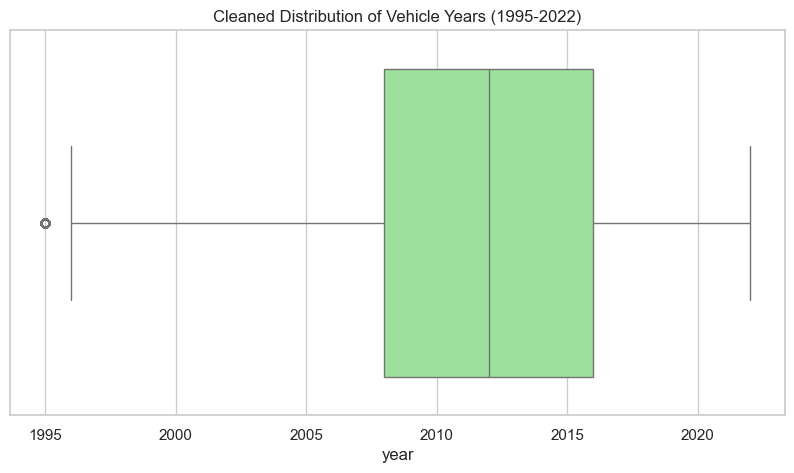

In [46]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df2['year'], color='lightgreen')
plt.title('Cleaned Distribution of Vehicle Years (1995-2022)')
plt.show()

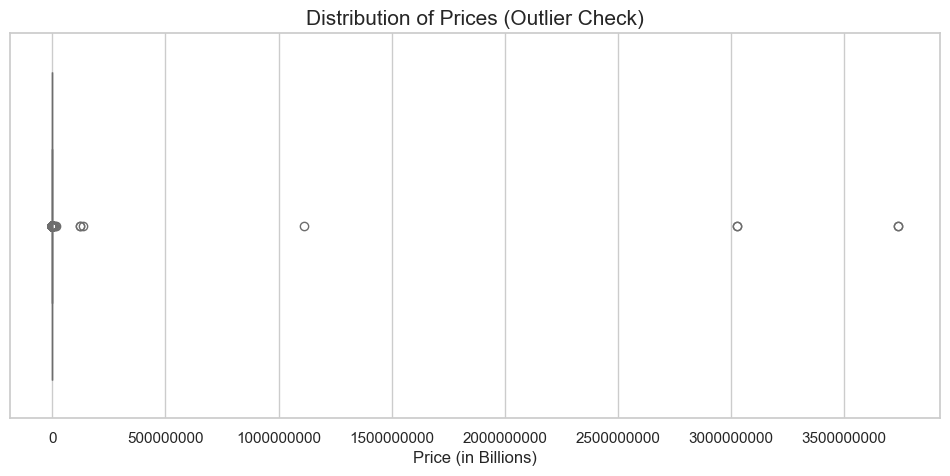

In [47]:
# Set the visual style
sns.set_theme(style="whitegrid")

# Create a box plot for the 'price' column
# We use a large figure size to help see the scale
plt.figure(figsize=(12, 5))
sns.boxplot(x=df2['price'], color='salmon')

# Add titles and formatting
plt.title('Distribution of Prices (Outlier Check)', fontsize=15)
plt.xlabel('Price (in Billions)', fontsize=12)

# Use scalar formatting to avoid scientific notation on the axis
plt.ticklabel_format(style='plain', axis='x')

# Save the plot
plt.savefig('price_outliers_boxplot.png')

New Price Range: $500 to $150,000


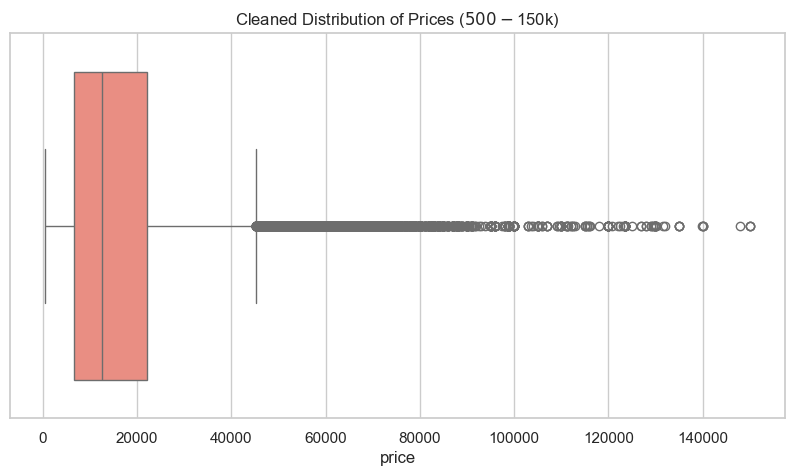

In [48]:
# 1. Filter for a realistic price range
df2 = df2[(df2['price'] >= 500) & (df2['price'] <= 150000)].reset_index(drop=True)

# 2. Check the new range
print(f"New Price Range: ${df2['price'].min():,} to ${df2['price'].max():,}")

# 3. Re-run the boxplot to see the ACTUAL distribution
plt.figure(figsize=(10, 5))
sns.boxplot(x=df2['price'], color='salmon')
plt.title('Cleaned Distribution of Prices ($500 - $150k)')
plt.show()

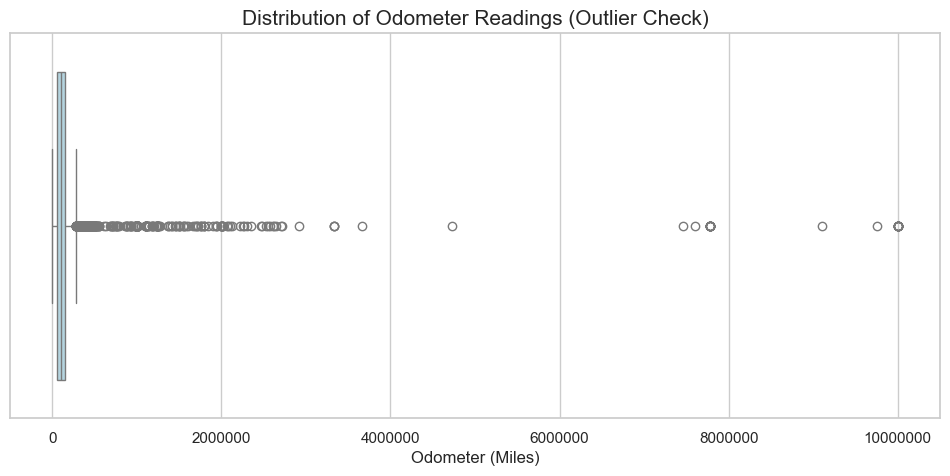

In [49]:
# Set the visual style
sns.set_theme(style="whitegrid")

# Create a box plot for the 'odometer' column
plt.figure(figsize=(12, 5))
sns.boxplot(x=df2['odometer'], color='lightblue')

# Add titles and formatting
plt.title('Distribution of Odometer Readings (Outlier Check)', fontsize=15)
plt.xlabel('Odometer (Miles)', fontsize=12)

# Prevent scientific notation on the axis for easier reading
plt.ticklabel_format(style='plain', axis='x')

# Save the plot
plt.savefig('odometer_outliers_boxplot.png')

Final Dataset Size: 177,611 rows


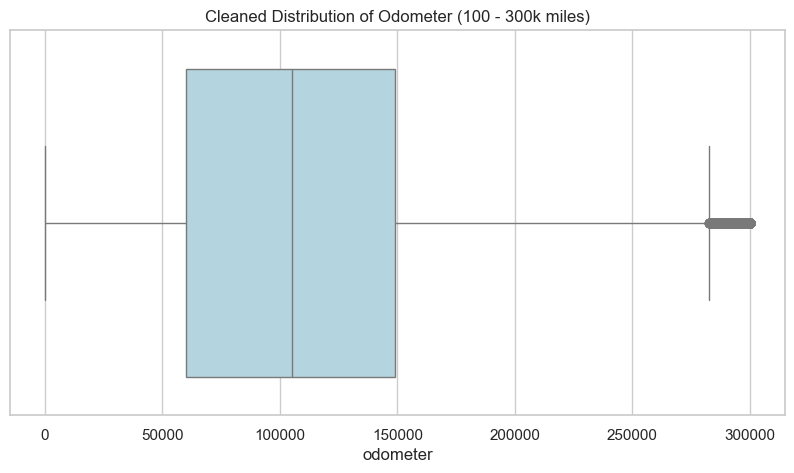

In [50]:
# Filter for realistic mileage
df2 = df2[(df2['odometer'] >= 100) & (df2['odometer'] <= 300000)].reset_index(drop=True)

# Final Check
print(f"Final Dataset Size: {len(df2):,} rows")

# Re-run the boxplot to see the beautiful new distribution
plt.figure(figsize=(10, 5))
sns.boxplot(x=df2['odometer'], color='lightblue')
plt.title('Cleaned Distribution of Odometer (100 - 300k miles)')
plt.show()

In [51]:
# 1. Numerical Ranges
print(f"--- Final Numerical Ranges ---")
print(f"Price Range:    ${df2['price'].min():,} to ${df2['price'].max():,}")
print(f"Year Range:     {df2['year'].min()} to {df2['year'].max()}")
print(f"Odometer Range: {df2['odometer'].min():,} to {df2['odometer'].max():,} miles")
print("\n" + "-"*30 + "\n")

# 2. Categorical Unique Values
# Note: 'condition' is gone and 'model_cleaned' is now in its place
categorical_cols = [
    'manufacturer', 'model_cleaned', 'cylinders', 'fuel', 
    'transmission', 'drive', 'size', 'type', 'paint_color'
]

print(f"--- Final Unique Categorical Values ---")
for col in categorical_cols:
    # Convert to standard Python strings and remove np.str_ formatting
    unique_vals = sorted(df2[col].unique().astype(str).tolist())
    print(f"{col.upper()} ({len(unique_vals)}):")
    # Show first 10 for long lists like models, otherwise show all
    if len(unique_vals) > 10:
        print(f"{unique_vals[:10]} ... [total {len(unique_vals)} items]")
    else:
        print(f"{unique_vals}")
    print("")

--- Final Numerical Ranges ---
Price Range:    $500 to $150,000
Year Range:     1995 to 2022
Odometer Range: 100 to 300,000 miles

------------------------------

--- Final Unique Categorical Values ---
MANUFACTURER (20):
['acura', 'audi', 'bmw', 'cadillac', 'chevrolet', 'chrysler', 'dodge', 'ford', 'gmc', 'honda'] ... [total 20 items]

MODEL_CLEANED (5917):
['1 ton', '12 ton trucks', '128i', '128i convertible', '128i coupe', '128ic', '135', '135i', '135i m', '135is'] ... [total 5917 items]

CYLINDERS (8):
['10 cylinders', '12 cylinders', '3 cylinders', '4 cylinders', '5 cylinders', '6 cylinders', '8 cylinders', 'other']

FUEL (5):
['diesel', 'electric', 'gas', 'hybrid', 'other']

TRANSMISSION (3):
['automatic', 'manual', 'other']

DRIVE (3):
['4wd', 'fwd', 'rwd']

SIZE (4):
['compact', 'full-size', 'mid-size', 'sub-compact']

TYPE (13):
['SUV', 'bus', 'convertible', 'coupe', 'hatchback', 'mini-van', 'offroad', 'other', 'pickup', 'sedan'] ... [total 13 items]

PAINT_COLOR (13):
['black

In [52]:
# Create a filter for 'other' fuel
df_fuel_other = df2[df2['fuel'] == 'other']

# Display the top 20 models that use 'other' fuel
print("Top Models with 'Other' Fuel:")
print(df_fuel_other['model_cleaned'].value_counts().head(20))

Top Models with 'Other' Fuel:
model_cleaned
f150                        241
silverado                   174
f250                        130
f150 supercrew cab          130
silverado 1500              103
f350                         74
tahoe                        72
focus                        71
corvette grand               70
tacoma access cab pickup     70
soul wagon 4d                69
sierra                       68
expedition                   66
impala                       66
f150 supercrew cab fx4       59
1500                         58
4runner sr5 utility          57
grand cherokee               57
grand caravan                56
tacoma access cab sr5        53
Name: count, dtype: int64


In [53]:
# 1. Create a mapping of the most frequent 'real' fuel for each model
# We exclude 'other' from the mode calculation to find the actual fuel type
fuel_map = df2[df2['fuel'] != 'other'].groupby('model_cleaned')['fuel'].apply(
    lambda x: x.mode()[0] if not x.mode().empty else None
)

# 2. Apply the mapping only to rows where fuel is currently 'other'
mask = df2['fuel'] == 'other'
df2.loc[mask, 'fuel'] = df2.loc[mask, 'model_cleaned'].map(fuel_map)

# 3. Handle unfixable rows
# If a model only ever had 'other' listed, it will now be NaN. 
# We delete those as requested.
df2 = df2.dropna(subset=['fuel'])
df2 = df2[df2['fuel'] != 'other'].reset_index(drop=True)

print(f"Remaining 'other' fuel entries: {(df2['fuel'] == 'other').sum()}")
print(f"Final unique fuel types: {df2['fuel'].unique()}")

Remaining 'other' fuel entries: 0
Final unique fuel types: ['gas' 'diesel' 'hybrid' 'electric']


In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177592 entries, 0 to 177591
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   price          177592 non-null  int64 
 1   year           177592 non-null  int64 
 2   manufacturer   177592 non-null  object
 3   model_cleaned  177592 non-null  object
 4   cylinders      177592 non-null  object
 5   fuel           177592 non-null  object
 6   odometer       177592 non-null  int64 
 7   transmission   177592 non-null  object
 8   drive          177592 non-null  object
 9   size           177592 non-null  object
 10  type           177592 non-null  object
 11  paint_color    177592 non-null  object
dtypes: int64(3), object(9)
memory usage: 16.3+ MB


In [55]:
# List of columns to fix using model-based imputation
cols_to_fix = ['cylinders', 'transmission']

for col in cols_to_fix:
    # 1. Create a map of the most frequent 'real' value for each model
    # We exclude 'other' to find the actual mechanical standard
    val_map = df2[df2[col] != 'other'].groupby('model_cleaned')[col].apply(
        lambda x: x.mode()[0] if not x.mode().empty else None
    )
    
    # 2. Replace 'other' and NaNs with the model's standard value
    mask = (df2[col] == 'other') | (df2[col].isna())
    df2.loc[mask, col] = df2.loc[mask, 'model_cleaned'].map(val_map)
    
    # 3. Drop rows where the model is so rare it couldn't be imputed
    df2 = df2.dropna(subset=[col])
    df2 = df2[df2[col] != 'other'].reset_index(drop=True)

# Final check of unique values
print("CLEANED CATEGORIES:")
print(f"Cylinders: {sorted(df2['cylinders'].unique())}")
print(f"Transmission: {sorted(df2['transmission'].unique())}")

CLEANED CATEGORIES:
Cylinders: ['10 cylinders', '12 cylinders', '3 cylinders', '4 cylinders', '5 cylinders', '6 cylinders', '8 cylinders']
Transmission: ['automatic', 'manual']


In [56]:
# 1. Define the high-cylinder counts to exclude
exclude_cyls = ['10 cylinders', '12 cylinders']

# 2. Filter the DataFrame
df2 = df2[~df2['cylinders'].isin(exclude_cyls)].reset_index(drop=True)

# 3. Verify the results
print(f"Total rows remaining: {len(df2):,}")
print("-" * 30)
print("Remaining Cylinder Categories:")
print(sorted(df2['cylinders'].unique()))

Total rows remaining: 176,618
------------------------------
Remaining Cylinder Categories:
['3 cylinders', '4 cylinders', '5 cylinders', '6 cylinders', '8 cylinders']


In [57]:
import pandas as pd

# 1. Final Numerical Ranges
print("--- FINAL NUMERICAL RANGES ---")
numerical_metrics = {
    "Price": df2['price'],
    "Year": df2['year'],
    "Odometer": df2['odometer']
}

for label, col in numerical_metrics.items():
    print(f"{label: <10}: ${col.min():,} to ${col.max():,}" if label == "Price" else f"{label: <10}: {col.min():,} to {col.max():,}")

print("\n" + "="*40 + "\n")

# 2. Final Categorical Unique Values (Now including Model_Cleaned)
categorical_cols = [
    'manufacturer', 'model_cleaned', 'cylinders', 'fuel', 
    'transmission', 'drive', 'size', 'type', 'paint_color'
]

print("--- FINAL CATEGORICAL UNIQUE VALUES ---")
for col in categorical_cols:
    unique_vals = sorted(df2[col].unique().astype(str).tolist())
    
    print(f"{col.upper()} ({len(unique_vals)} items):")
    
    # If it's the model column, just show a small sample so it doesn't flood the screen
    if col == 'model_cleaned':
        print(f"Sample: {unique_vals[:15]} ...")
    else:
        print(f"{unique_vals}")
    print("")

print(f"Total Cleaned Rows: {len(df2):,}")

--- FINAL NUMERICAL RANGES ---
Price     : $500 to $150,000
Year      : 1,995 to 2,022
Odometer  : 100 to 300,000


--- FINAL CATEGORICAL UNIQUE VALUES ---
MANUFACTURER (20 items):
['acura', 'audi', 'bmw', 'cadillac', 'chevrolet', 'chrysler', 'dodge', 'ford', 'gmc', 'honda', 'hyundai', 'jeep', 'kia', 'lexus', 'mercedes-benz', 'nissan', 'ram', 'subaru', 'toyota', 'volkswagen']

MODEL_CLEANED (5826 items):
Sample: ['1 ton', '12 ton trucks', '128i', '128i convertible', '128i coupe', '128ic', '135', '135i', '135i m', '135is', '15 passenger van', '150', '1500', '1500 4 x 4', '1500 4x4'] ...

CYLINDERS (5 items):
['3 cylinders', '4 cylinders', '5 cylinders', '6 cylinders', '8 cylinders']

FUEL (4 items):
['diesel', 'electric', 'gas', 'hybrid']

TRANSMISSION (2 items):
['automatic', 'manual']

DRIVE (3 items):
['4wd', 'fwd', 'rwd']

SIZE (4 items):
['compact', 'full-size', 'mid-size', 'sub-compact']

TYPE (13 items):
['SUV', 'bus', 'convertible', 'coupe', 'hatchback', 'mini-van', 'offroad', '

In [58]:
# Option 1: Save as a standard CSV (Good for general use)
df2.to_csv('cleaned_vehicles_dataset.csv', index=False)
print("Dataset saved as cleaned_vehicles_dataset.csv")

Dataset saved as cleaned_vehicles_dataset.csv


Debo correr esto para la siguiente session
# 1. Load the dataset
df2 = pd.read_csv('cleaned_vehicles_dataset.csv')

# 2. Force consistency on Categorical Columns
categorical_cols = [
    'manufacturer', 'model_cleaned', 'cylinders', 'fuel', 
    'transmission', 'drive', 'size', 'type', 'paint_color'
]

for col in categorical_cols:
    df2[col] = df2[col].astype('category')

# 3. Ensure Numerical Columns are correct
df2['price'] = df2['price'].astype(int)
df2['year'] = df2['year'].astype(int)
df2['odometer'] = df2['odometer'].astype(float)

print("--- Dataset Reloaded Successfully ---")
print(f"Total Rows: {len(df2):,}")
df2.info()